<a href="https://colab.research.google.com/github/dhk/adventures-in-ai/blob/main/greatest-democracy/democracy_greatness_including_new_zealand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

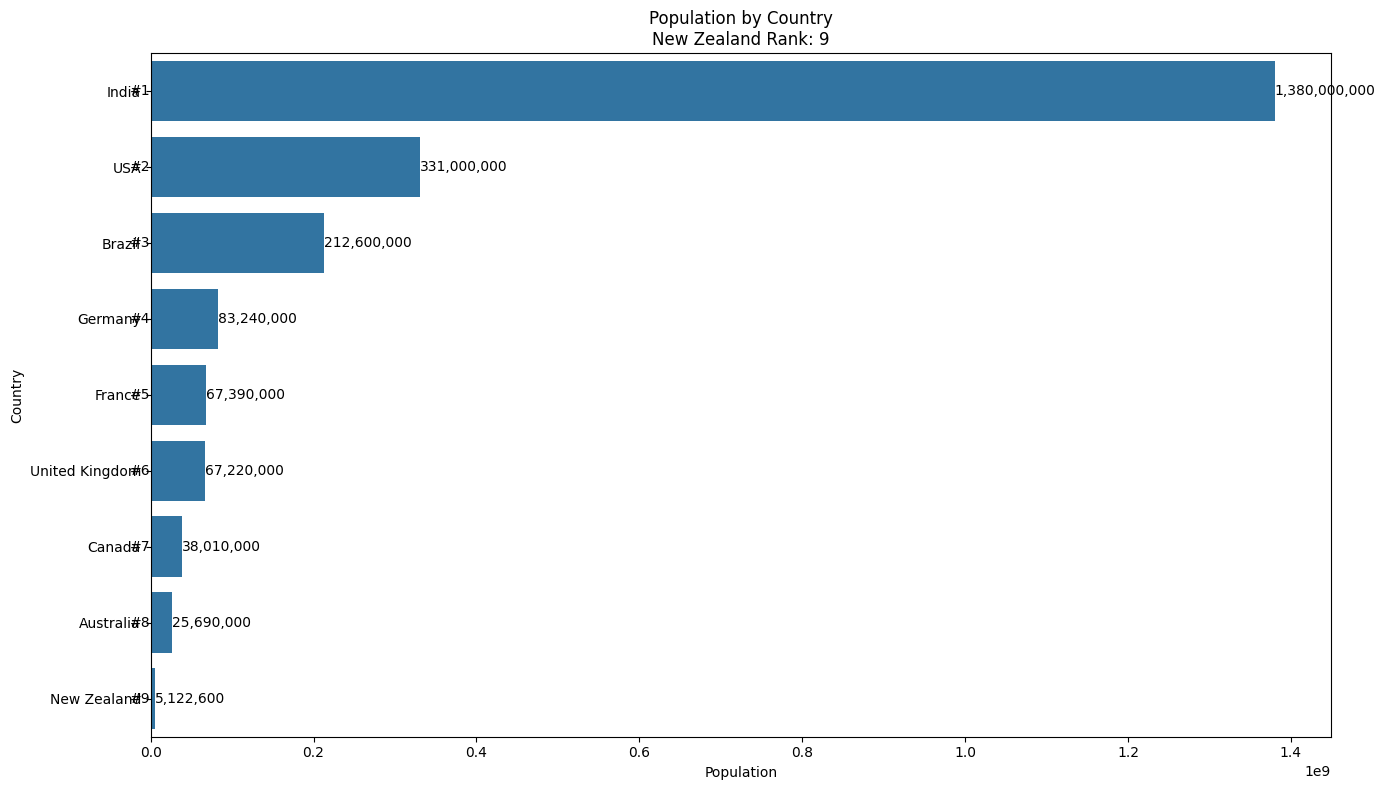

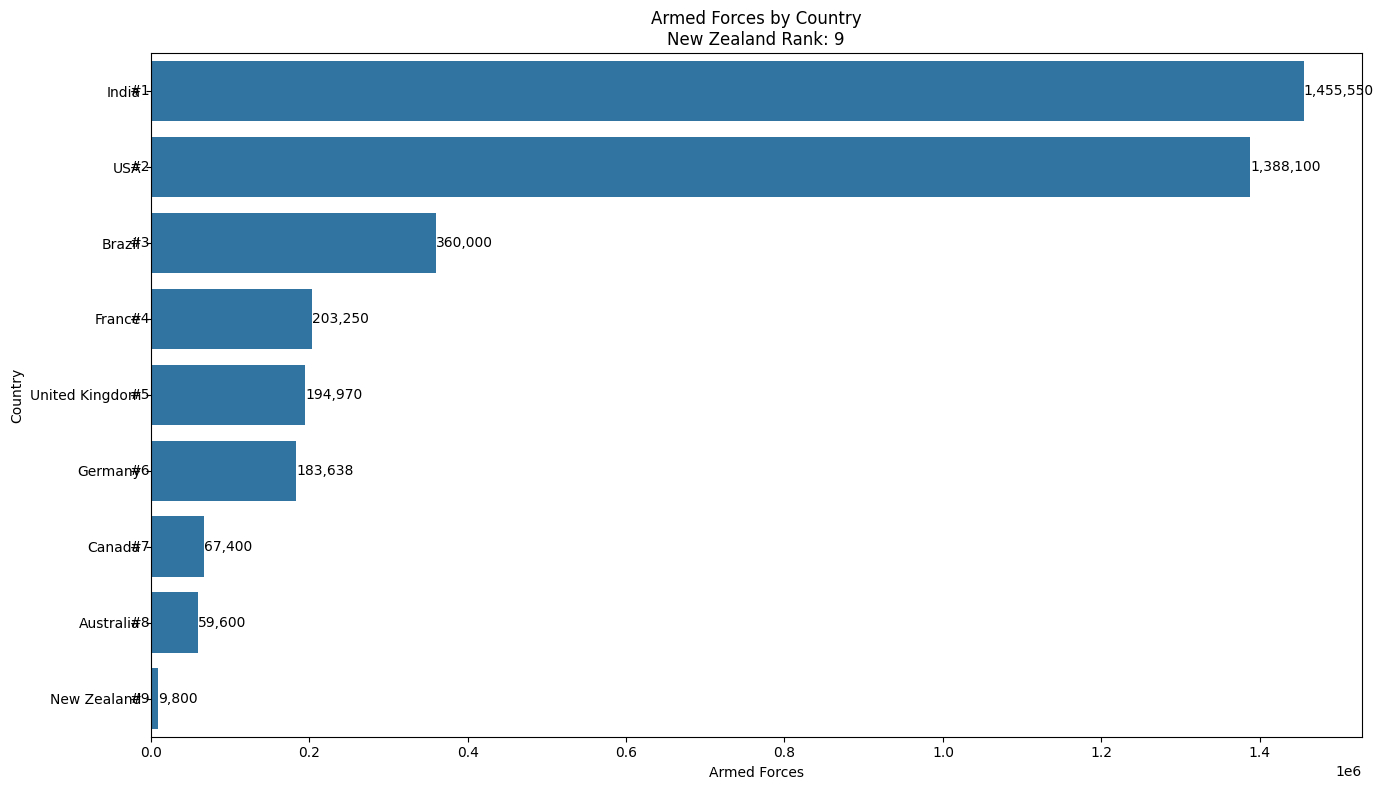

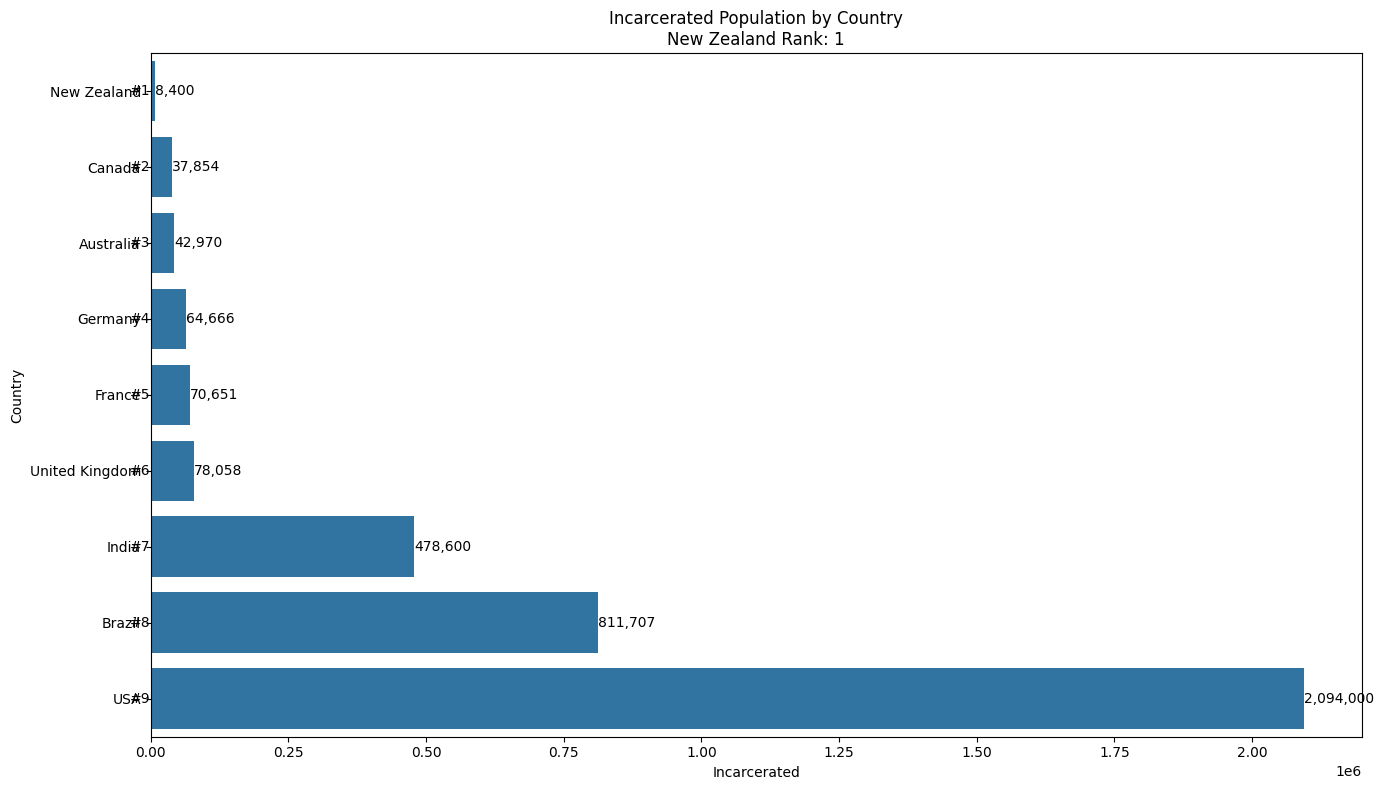

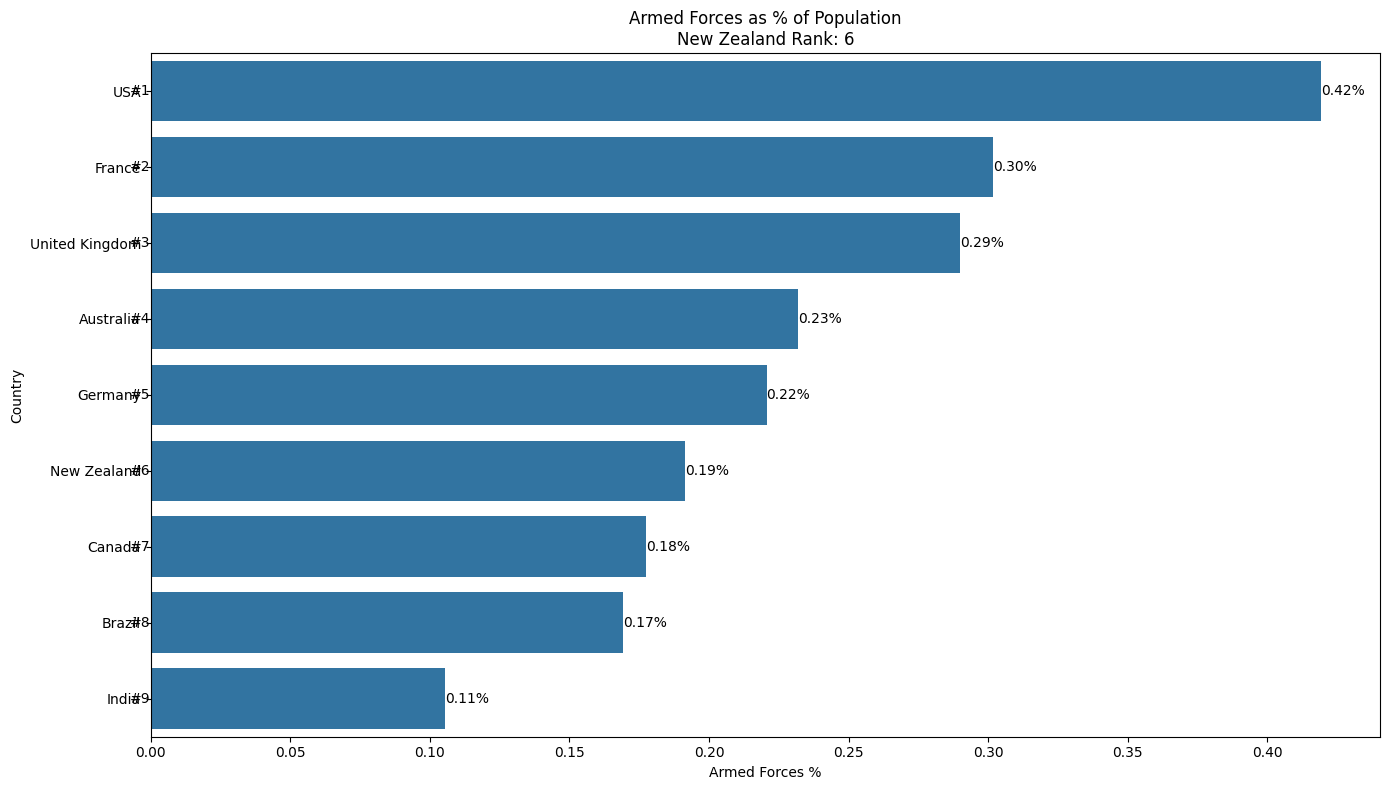

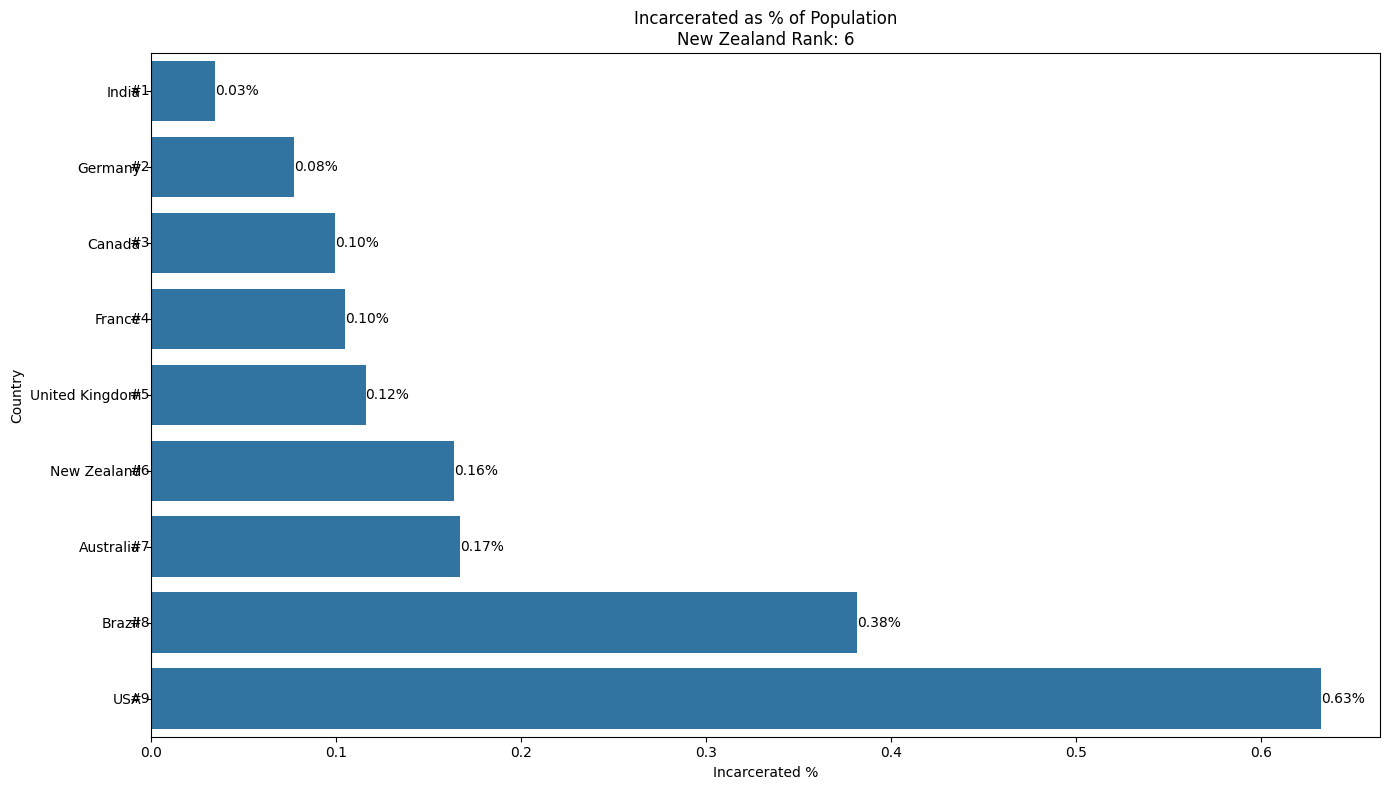

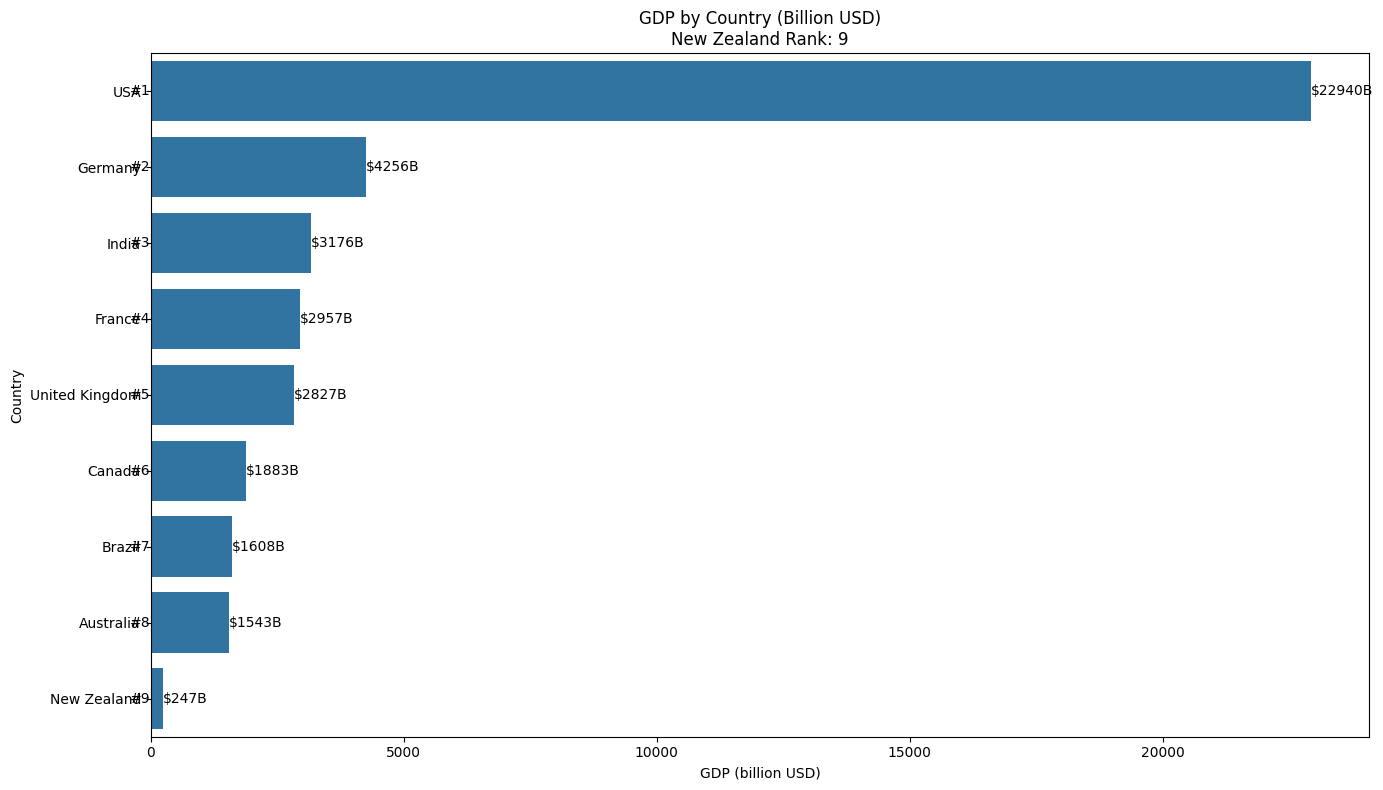

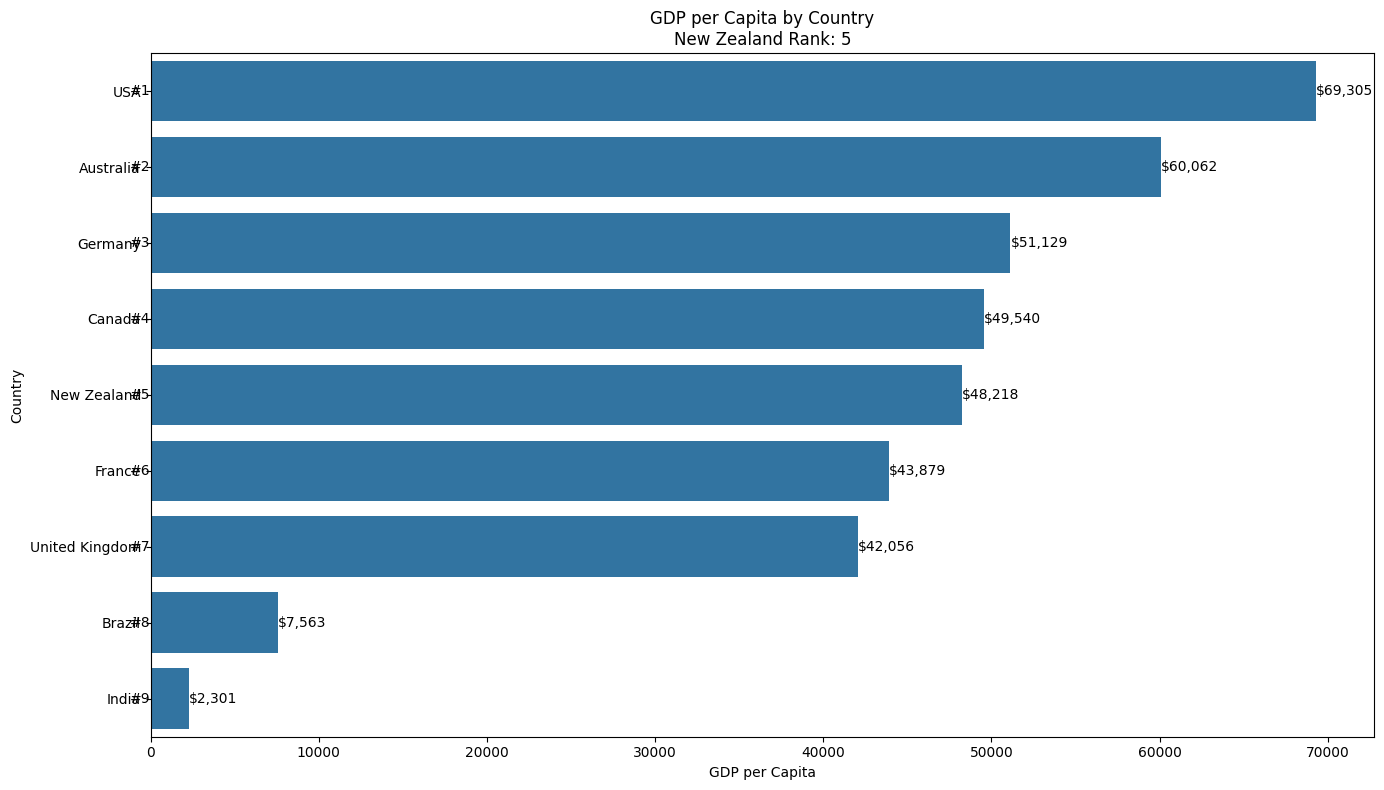

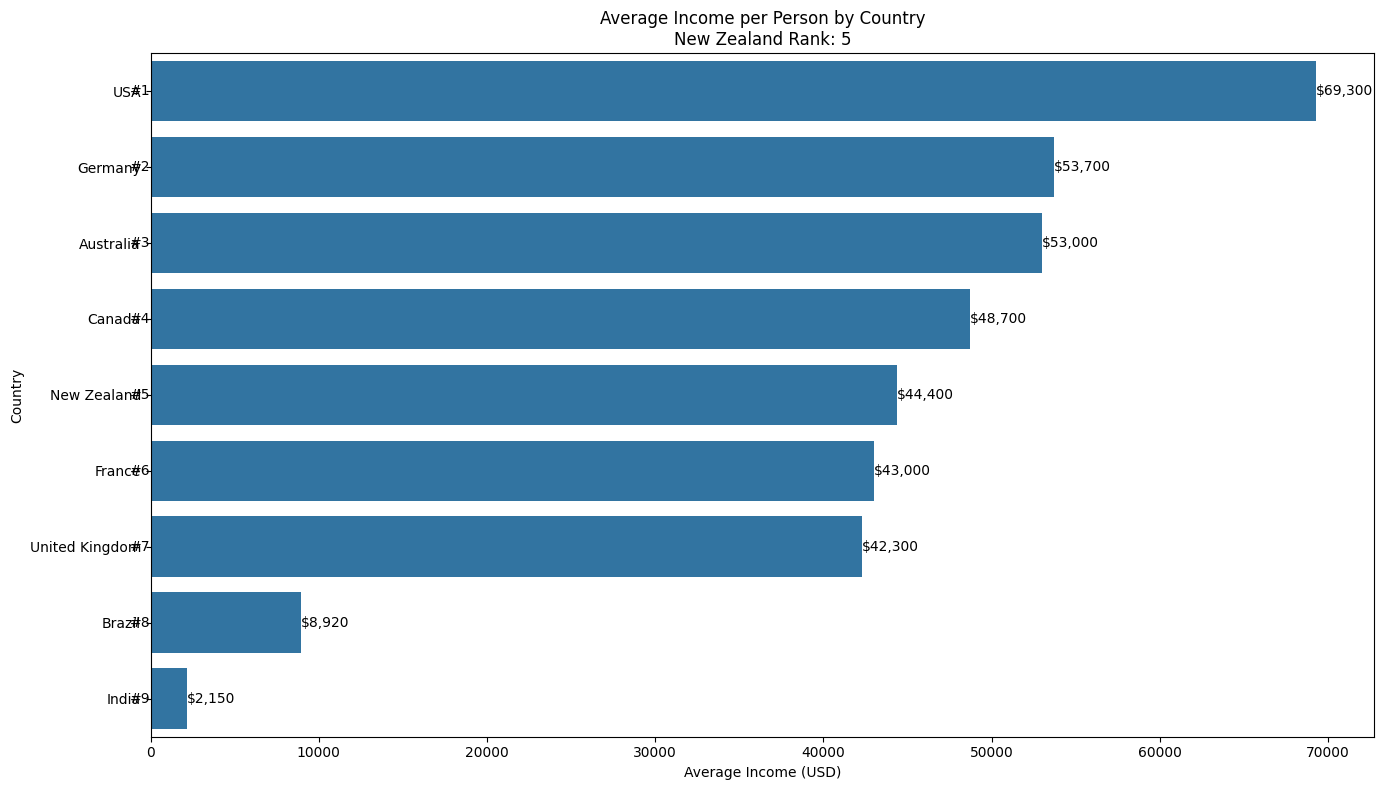

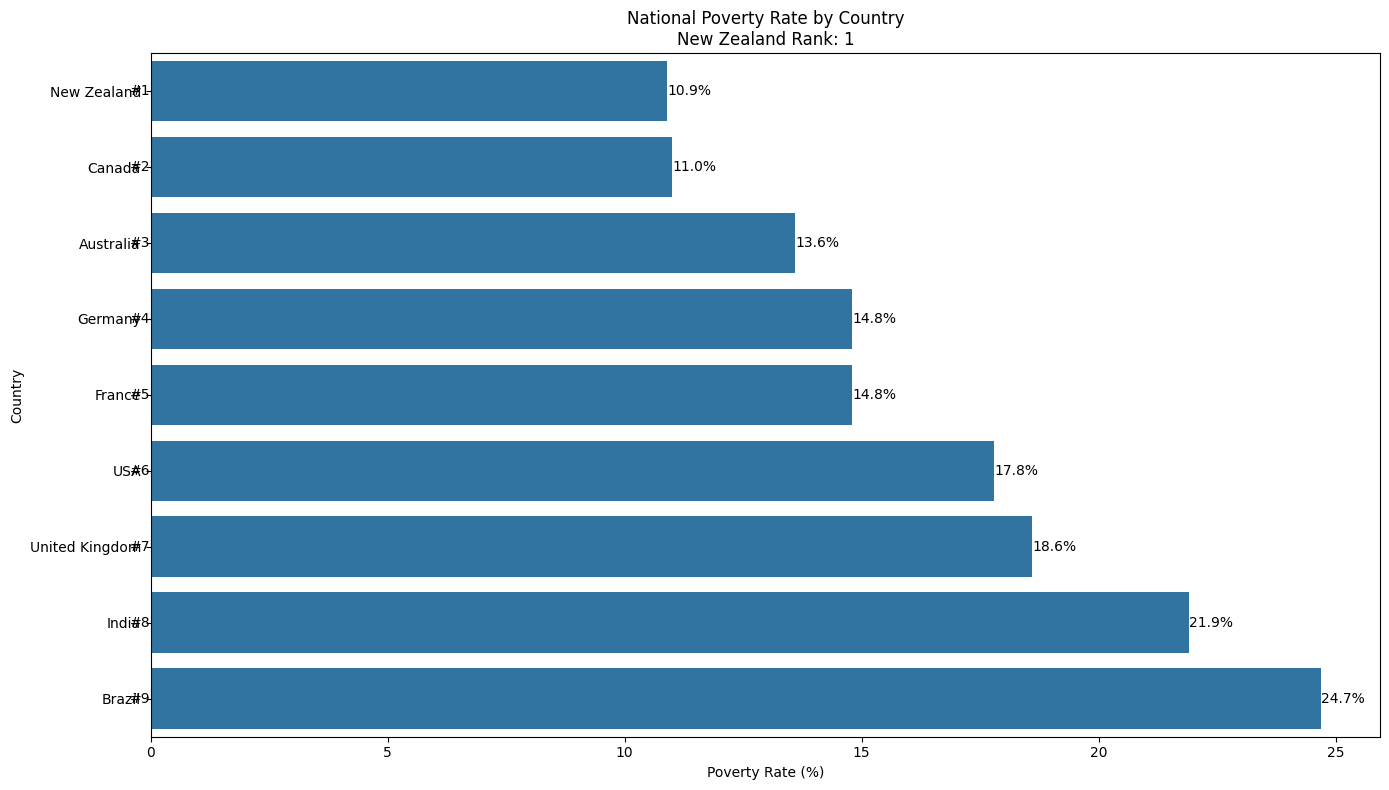

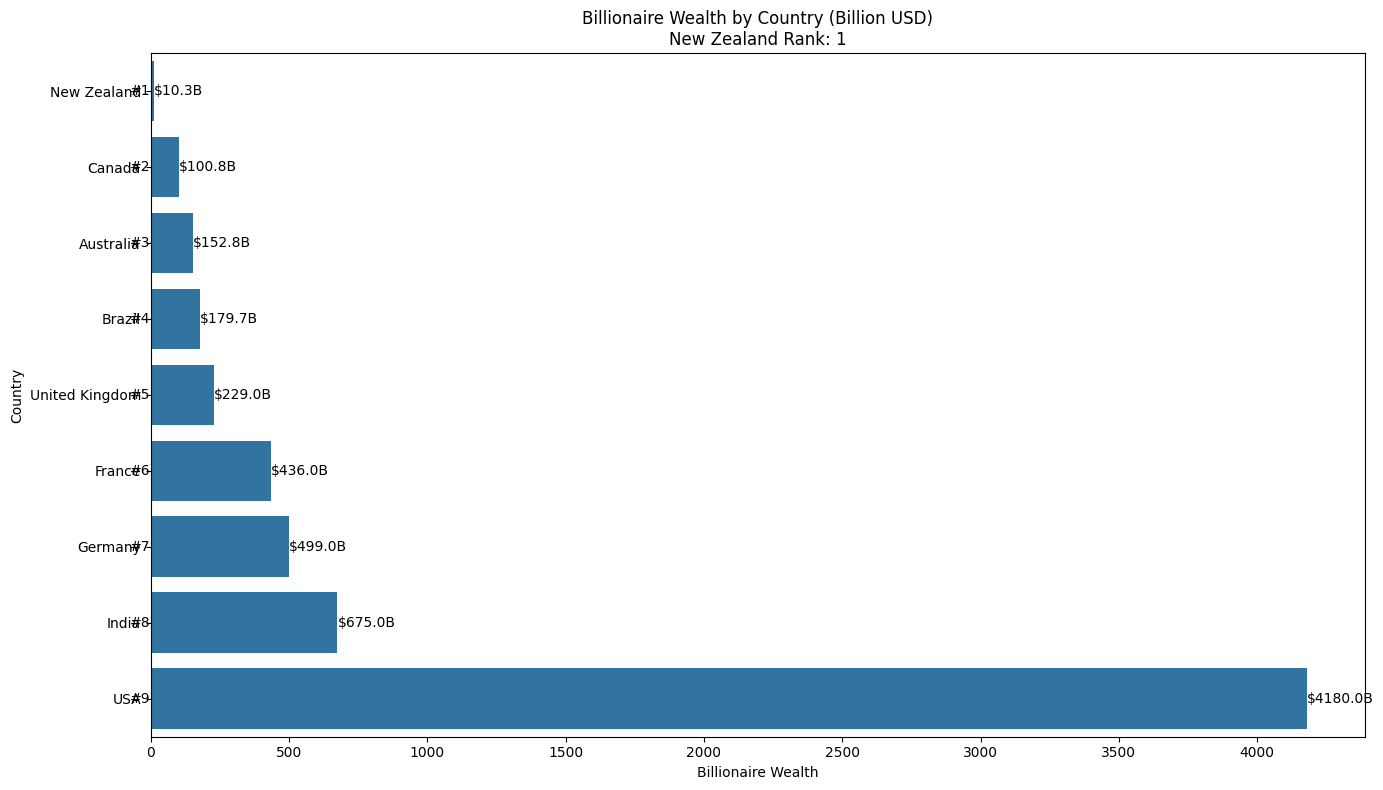

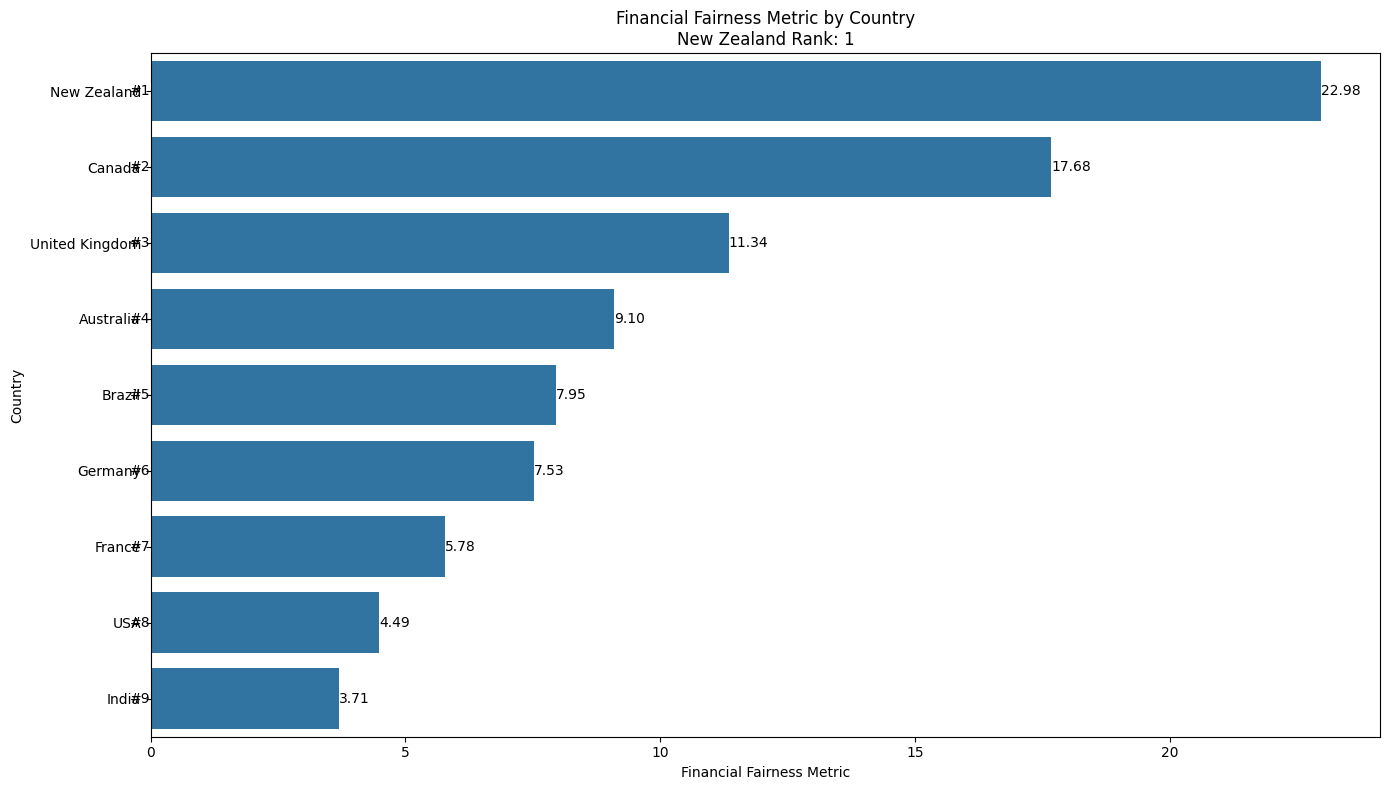

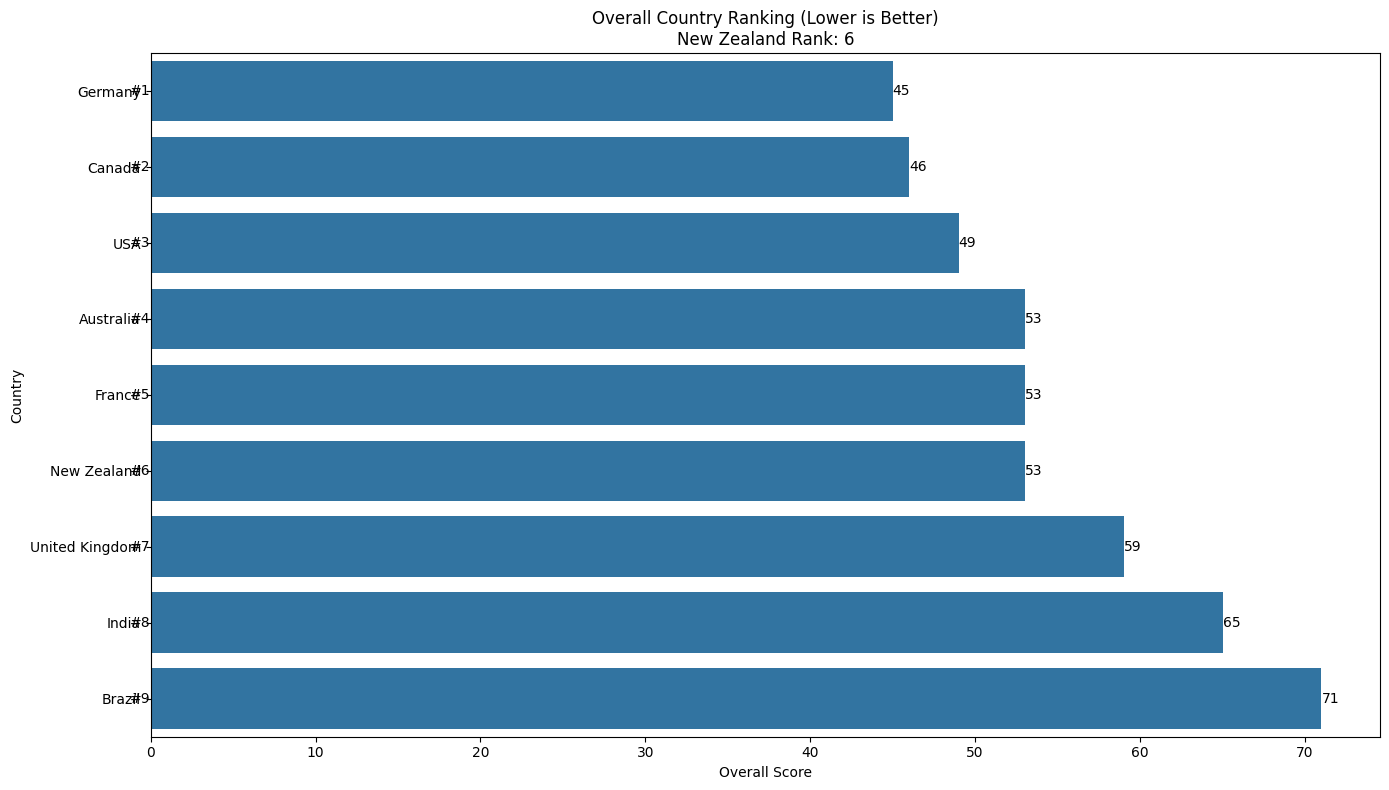

       Country  Population  Armed Forces  Incarcerated  GDP (billion USD)  Average Income (USD)  Poverty Rate (%)  Billionaire Wealth  Armed Forces %  Incarcerated %  GDP per Capita  Financial Fairness Metric  Population Rank  Armed Forces Rank  Incarcerated Rank  GDP (billion USD) Rank  Average Income (USD) Rank  Poverty Rate (%) Rank  Billionaire Wealth Rank  Armed Forces % Rank  Incarcerated % Rank  GDP per Capita Rank  Financial Fairness Metric Rank  Overall Score
United Kingdom    67220000        194970         78058               2827                 42300              18.6               229.0        0.290048        0.116123    42055.935733                  11.344978                6                  5                  6                       5                          7                      7                        5                    3                    5                    7                               3             59
       Germany    83240000        183638         64666

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# [Previous data and initial calculations remain the same]

# Function to create and display a bar plot with value labels and rankings
def create_ranked_bar_plot(df, column, title, fmt='', ascending=False):
    df_sorted = df.sort_values(column, ascending=ascending).reset_index(drop=True)
    df_sorted['Rank'] = df_sorted.index + 1
    new_zealand_rank = df_sorted[df_sorted['Country'] == 'New Zealand']['Rank'].values[0]

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=column, y='Country', data=df_sorted)
    plt.title(f"{title}\nNew Zealand Rank: {new_zealand_rank}")

    if fmt:
        ax.bar_label(ax.containers[0], fmt=fmt)

    for i, v in enumerate(df_sorted[column]):
        ax.text(0, i, f"#{i+1}", ha='right', va='center')

    plt.tight_layout()
    plt.show()

# Create visualizations with rankings
metrics = [
    ('Population', 'Population by Country', '{:,.0f}', False),
    ('Armed Forces', 'Armed Forces by Country', '{:,.0f}', False),
    ('Incarcerated', 'Incarcerated Population by Country', '{:,.0f}', True),
    ('Armed Forces %', 'Armed Forces as % of Population', '{:.2f}%', False),
    ('Incarcerated %', 'Incarcerated as % of Population', '{:.2f}%', True),
    ('GDP (billion USD)', 'GDP by Country (Billion USD)', '${:.0f}B', False),
    ('GDP per Capita', 'GDP per Capita by Country', '${:,.0f}', False),
    ('Average Income (USD)', 'Average Income per Person by Country', '${:,.0f}', False),
    ('Poverty Rate (%)', 'National Poverty Rate by Country', '{:.1f}%', True),
    ('Billionaire Wealth', 'Billionaire Wealth by Country (Billion USD)', '${:.1f}B', True),
    ('Financial Fairness Metric', 'Financial Fairness Metric by Country', '{:.2f}', False)
]

# Calculate rankings for each metric
for column, title, fmt, ascending in metrics:
    df[f'{column} Rank'] = df[column].rank(ascending=ascending, method='min').astype(int)
    create_ranked_bar_plot(df, column, title, fmt, ascending)

# Calculate overall score (lower is better)
rank_columns = [col for col in df.columns if col.endswith(' Rank')]
df['Overall Score'] = df[rank_columns].sum(axis=1)

# Create overall ranking visualization
create_ranked_bar_plot(df, 'Overall Score', 'Overall Country Ranking (Lower is Better)', '{:.0f}', ascending=True)

# Print the updated DataFrame with rankings and overall score
print(df.to_string(index=False))

# Print New Zealand's rankings
nz_ranks = df[df['Country'] == 'New Zealand'].iloc[0]
print("\nNew Zealand's rankings:")
for column in df.columns:
    if column.endswith(' Rank') or column == 'Overall Score':
        metric = column.replace(' Rank', '')
        rank = nz_ranks[column]
        print(f"{metric}: #{rank}")

# Function to recalculate overall score with custom weights
def recalculate_overall_score(weights):
    weighted_ranks = df[rank_columns].mul(weights)
    return weighted_ranks.sum(axis=1)

# Example of how to use the recalculate_overall_score function:
# custom_weights = {'Population Rank': 2, 'GDP (billion USD) Rank': 3}  # All other weights default to 1
# df['Custom Overall Score'] = recalculate_overall_score(custom_weights)
# create_ranked_bar_plot(df, 'Custom Overall Score', 'Custom Overall Country Ranking', '{:.0f}', ascending=True)

In [ ]:
```